# Machine Learning Project 1

## Glass type identification with Machine Learning

The study is mainly focused on classification of different types of glasses. The study of classification of glasses is motivated by crimonological investigation. In the dataset, there are total of 214 glasses with 10 features. The 10 features are:
1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)
    
There are 7 types of glasses to be predicted which are mapped to value of 1-7
1. building_windows_float_processed
2. building_windows_non_float_processed
3. vehicle_windows_float_processed
4. vehicle_windows_non_float_processed (none in this database)
5. containers
6. tableware
7. headlamps

Link to dataset: https://archive.ics.uci.edu/ml/datasets/glass+identification


In [1]:
import graphviz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score



df = pd.read_csv('glass_data.csv')

df.info()

# Array to keep our best scores
best_scores = []


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   column_a  214 non-null    int64  
 1   column_b  214 non-null    float64
 2   column_c  214 non-null    float64
 3   column_d  214 non-null    float64
 4   column_e  214 non-null    float64
 5   column_f  214 non-null    float64
 6   column_g  214 non-null    float64
 7   column_h  214 non-null    float64
 8   column_i  214 non-null    float64
 9   column_j  214 non-null    float64
 10  column_k  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [2]:
label_encoder = LabelEncoder()
df["column_k"] = label_encoder.fit_transform(df["column_k"])

In [3]:
df = df.rename(columns = {
    'column_a': 'id',
    'column_b': 'RI',
    'column_c': 'Na', 
    'column_d': 'Mg',
    'column_e': 'Al',
    'column_f': 'Si',
    'column_g': 'K',
    'column_h': 'Ca',
    'column_i': 'Ba',
    'column_j': 'Fe',
    'column_k': 'TOG'
})


In [4]:
df = df.iloc[:, 1:]
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,TOG
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,0


In [5]:
df.isnull().values.any()

False

In [6]:
X = df.drop('TOG', axis = 1).values
y = df['TOG'].values

#### Splitting data

In [30]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

#### Standarizing the data

In [8]:
#standardizing 
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

## Logistic Regression

In [18]:
c = [1,10,100,1000]

grid = [
    #Using L1 penalty
    {'penalty': ['l1'], 'solver': ['saga'],'C':c},
    #Using L2 penalty
    {'penalty': ['l2'], 'solver': ['newton-cg','lbfgs', 'sag', 'saga' ],'C':c}
]

logreg = LogisticRegression(max_iter = 5000)

### Logistic Regression using Precision

In [19]:
logreg_gscv_precision = GridSearchCV(estimator=logreg,param_grid = grid,cv = 5,n_jobs = -1, refit = True, scoring = "precision_micro" )
logreg_gscv_precision.fit(X_train_std, y_train)


##Scores
best_logreg_precision = logreg_gscv_precision.best_estimator_
best_hyperparam = logreg_gscv_precision.best_params_
best_training_score = logreg_gscv_precision.best_score_
best_testscore = best_logreg_precision.score(X_test_std, y_test)
best_scores.append([best_training_score, best_testscore])

In [20]:
print('Best hyperparameter using precision: ')
print(best_hyperparam)
print('Best Training score using precision: ')
print(best_training_score)
print('Best Test Score using precision: ')
print(best_testscore)


Best hyperparameter using precision: 
{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Training score using precision: 
0.6445977011494253
Best Test Score using precision: 
0.6615384615384615


### Logistic regression using recall

In [21]:
logreg_gscv_recall = GridSearchCV(estimator = logreg, param_grid = grid, cv = 5, n_jobs = -1, scoring = 'recall_macro', refit = True)

logreg_gscv_recall.fit(X_train_std, y_train)


best_logreg_recall = logreg_gscv_recall.best_estimator_
best_hyperparam = logreg_gscv_recall.best_params_
best_train_score = logreg_gscv_recall.best_score_
best_testscore = best_logreg_recall.score(X_test_std, y_test)
best_scores.append([best_train_score, best_testscore])


In [22]:
print('Best hyperparameter using precision: ')
print(best_hyperparam)
print('Best Training score using precision: ')
print(best_train_score)
print('Best Test Score using precision: ')
print(best_testscore)

Best hyperparameter using precision: 
{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Training score using precision: 
0.6305050505050505
Best Test Score using precision: 
0.6615384615384615


### Logistic regression with f1

In [23]:
logreg_gscv_f1 = GridSearchCV(estimator = logreg, param_grid = grid, cv = 5, n_jobs = -1, scoring = 'f1_macro')
logreg_gscv_f1.fit(X_train_std, y_train)


best_logreg_f1 = logreg_gscv_f1.best_estimator_
best_hyperparam = logreg_gscv_f1.best_params_
best_trainscore = logreg_gscv_f1.best_score_
best_testscore = best_logreg_f1.score(X_test_std, y_test)

print('Best hyperparameter using recall: ')
print(best_hyperparam)
print('Best Training score using recall: ')
print(best_trainscore)
print('Best Test Score using recall: ')
print(best_testscore)
best_scores.append([best_trainscore, best_testscore])

Best hyperparameter using recall: 
{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Training score using recall: 
0.6109088360575774
Best Test Score using recall: 
0.6615384615384615


#### K Fold Cross Validation for Logistic Regression with precision

In [24]:
kfold = KFold(n_splits=5, random_state=42, shuffle=True)
results = cross_val_score(logreg_gscv_precision, X_train_std, y_train, cv=kfold, verbose = False)# Output the accuracy. Calculate the mean and std across all folds. 
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

/home/sergeant/.local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/home/sergeant/.local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 59.678% (6.686%)


## SVM

In [10]:
degree_range = [2,3,4,5,6]

grid = [
    {'degree': degree_range, 'kernel': ['linear', 'rbf', 'sigmoid', 'poly'], 'gamma' : ['scale', 'auto'], 'C': [10,100]}
]

svc = SVC(max_iter = 100000, class_weight = "balanced")

### SVM using precision

In [11]:
svc_precision_gscv = GridSearchCV(estimator = svc, param_grid = grid, cv = 5, n_jobs = -1, scoring = 'precision_micro', verbose = False)
svc_precision_gscv.fit(X_train_std, y_train)

best_svc_precision = svc_precision_gscv.best_estimator_
best_hyperparam_svc1 = svc_precision_gscv.best_params_
best_trainscore_svc1 = best_svc_precision.score(X_train_std, y_train)
best_testscore_svc1 = best_svc_precision.score(X_test_std, y_test)

In [27]:
best_scores.append([best_trainscore_svc1, best_testscore_svc1])


print('Best hyperparameter: ')
print(best_hyperparam_svc1)
print('Best Training score: ')
print(best_trainscore_svc1)
print('Best Test Score: ')
print(best_testscore_svc1)

Best hyperparameter: 
{'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best Training score: 
0.7718120805369127
Best Test Score: 
0.676923076923077


### svm using recall

In [28]:
svc_recall_gscv = GridSearchCV(estimator = svc, param_grid = grid, cv = 5, n_jobs = -1,scoring = 'recall_macro')
svc_recall_gscv.fit(X_train_std, y_train)


best_svc_recall = svc_recall_gscv.best_estimator_
best_hyperparam_svc2 = svc_recall_gscv.best_params_
best_trainscore_svc2 = svc_recall_gscv.best_score_
best_testscore_svc2 = best_svc_recall.score(X_test_std, y_test)

In [29]:
best_scores.append([best_trainscore_svc2, best_testscore_svc2])


print('Best hyperparameter: ')
print(best_hyperparam_svc2)
print('Best Training score: ')
print(best_trainscore_svc2)
print('Best Test Score: ')
print(best_testscore_svc2)


Best hyperparameter: 
{'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best Training score: 
0.6722222222222223
Best Test Score: 
0.676923076923077


### svm using f1

In [30]:
svc_gscv_f1 = GridSearchCV(estimator = svc, param_grid = grid, cv = 5, n_jobs = -1, scoring = 'f1_macro')
svc_gscv_f1.fit(X_train_std, y_train)

best_svc_f1 = svc_gscv_f1.best_estimator_
best_hyperparam_f1 = svc_gscv_f1.best_params_
best_trainscore_f1 = svc_gscv_f1.best_score_
best_testscore_f1 = best_svc_f1.score(X_test_std, y_test)

In [31]:
best_scores.append([best_trainscore_f1, best_testscore_f1])


print('Best hyperparameter: ')
print(best_hyperparam_f1)
print('Best Training score: ')
print(best_trainscore_f1)
print('Best Test Score: ')
print(best_testscore_f1)

Best hyperparameter: 
{'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best Training score: 
0.651836825655711
Best Test Score: 
0.676923076923077


#### K Fold Cross Validation for SVM using f1

In [32]:
kfold = KFold(n_splits=5, random_state=42, shuffle=True)
results = cross_val_score(svc_gscv_f1, X_train_std, y_train, cv=kfold, verbose = False)# Output the accuracy. Calculate the mean and std across all folds. 
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

/home/sergeant/.local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/home/sergeant/.local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 59.028% (11.406%)


# MLP Classifier

In [15]:
range_grid = np.logspace(1,1,25, endpoint = True)
grid = [
    {'hidden_layer_sizes': [(12, ), (10,32)], 'activation': ['logistic', 'tanh', 'relu'], 'solver': ['lbfgs','adam', 'sgd'], 'alpha': range_grid}
]

mlp = MLPClassifier(max_iter = 2000)

### MLP using precision

In [14]:
mlp_gscv_precision = GridSearchCV(estimator = mlp, param_grid = grid, cv = 5, n_jobs = -1, scoring = 'precision_micro')
mlp_gscv_precision.fit(X_train_std, y_train)

best_mlp_precision = mlp_gscv_precision.best_estimator_

#Best hyperparameters, training and testing score
print("Best hyperparameter: ")
print(mlp_gscv_precision.best_params_)
print('Best training score: ')
print(best_mlp_precision.score(X_train_std, y_train))
print("Best testing score: ")
print(best_mlp_precision.score(X_test_std, y_test))

#Appending best training score and best testing score
best_scores.append([best_mlp_precision.score(X_train_std, y_train), best_mlp_precision.score(X_test_std, y_test)])


Best hyperparameter: 
{'activation': 'relu', 'alpha': 10.0, 'hidden_layer_sizes': (12,), 'solver': 'adam'}
Best training score: 
0.6912751677852349
Best testing score: 
0.6307692307692307


### MLP Using recall

In [35]:
mlp_gscv_recall = GridSearchCV(estimator = mlp, param_grid = grid, cv = 5, n_jobs = -1, scoring = 'recall_macro')
mlp_gscv_recall.fit(X_train_std, y_train)

best_mlp_recall = mlp_gscv_recall.best_estimator_

#Best hyperparameters, training and testing score
print("Best hyperparameter: ")
print(mlp_gscv_recall.best_params_)
print('Best training score: ')
print(mlp_gscv_recall.best_score_)
print("Best testing score: ")
print(best_mlp_recall.score(X_test_std, y_test))

#Appending best training score and best testing score
best_scores.append([mlp_gscv_recall.best_score_, best_mlp_recall.score(X_test_std, y_test)])

Best hyperparameter: 
{'activation': 'relu', 'alpha': 10.0, 'hidden_layer_sizes': (12,), 'solver': 'lbfgs'}
Best training score: 
0.397070707070707
Best testing score: 
0.6461538461538462


### MLP using f1

In [36]:
mlp_gscv_f1 = GridSearchCV(estimator = mlp, param_grid = grid, cv = 5, n_jobs = -1, scoring = 'f1_macro')
mlp_gscv_f1.fit(X_train_std, y_train)

best_mlp_f1 = mlp_gscv_f1.best_estimator_

#Best hyperparameters, training and testing score
print("Best hyperparameter: ")
print(mlp_gscv_f1.best_params_)
print('Best training score: ')
print(best_mlp_f1.score(X_train_std, y_train))
print("Best testing score: ")
print(best_mlp_f1.score(X_test_std, y_test))

#Appending best training score and best testing score
best_scores.append([best_mlp_f1.score(X_train_std, y_train),best_mlp_f1.score(X_test_std, y_test)])

Best hyperparameter: 
{'activation': 'relu', 'alpha': 10.0, 'hidden_layer_sizes': (12,), 'solver': 'adam'}
Best training score: 
0.6912751677852349
Best testing score: 
0.6153846153846154


# Decision Tree Classifier

In [38]:
grid = [
  {'criterion' : ['gini', 'entropy'], 'splitter' : ['best', 'random'], 'ccp_alpha' : np.logspace(-3, 0, 20)},
]

tree = DecisionTreeClassifier(class_weight = "balanced")

### Decision tree using precision

In [41]:
tree_precision_gscv = GridSearchCV(estimator=tree, param_grid=grid, cv = 5, n_jobs=-1, scoring='precision_micro')
tree_precision_gscv.fit(X_train_std, y_train)

best_tree_precision = tree_precision_gscv.best_estimator_

#Best hyperparameters, training and testing score
print("Best hyperparameter: ")
print(tree_precision_gscv.best_params_)
print('Best training score: ')
print(best_tree_precision.score(X_train_std, y_train))
print("Best testing score: ")
print(best_tree_precision.score(X_test_std, y_test))

#Appending best training score and best testing score
best_scores.append([best_tree_precision.score(X_train_std, y_train), best_tree_precision.score(X_test_std, y_test)])

Best hyperparameter: 
{'ccp_alpha': 0.002976351441631319, 'criterion': 'gini', 'splitter': 'random'}
Best training score: 
0.9865771812080537
Best testing score: 
0.6615384615384615


### Decision Tree using recall

In [42]:
tree_recall_gscv = GridSearchCV(estimator=tree, param_grid=grid, cv = 5, n_jobs=-1, scoring='recall_macro')
tree_recall_gscv.fit(X_train_std, y_train)

best_tree_recall = tree_recall_gscv.best_estimator_

#Best hyperparameters, training and testing score
print("Best hyperparameter: ")
print(tree_recall_gscv.best_params_)
print('Best training score: ')
print(best_tree_recall.score(X_train_std, y_train))
print("Best testing score: ")
print(best_tree_recall.score(X_test_std, y_test))

#Appending best training score and best testing score
best_scores.append([best_tree_recall.score(X_train_std, y_train), best_tree_recall.score(X_test_std, y_test)])

Best hyperparameter: 
{'ccp_alpha': 0.018329807108324356, 'criterion': 'gini', 'splitter': 'random'}
Best training score: 
0.6644295302013423
Best testing score: 
0.6153846153846154


### Decision Tree using f1

In [43]:
tree_f1_gscv = GridSearchCV(estimator=tree, param_grid=grid, cv = 5, n_jobs=-1, scoring='f1_macro')
tree_f1_gscv.fit(X_train_std, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid=[{'ccp_alpha': array([0.001     , 0.00143845, 0.00206914, 0.00297635, 0.00428133,
       0.00615848, 0.00885867, 0.01274275, 0.01832981, 0.02636651,
       0.0379269 , 0.05455595, 0.078476  , 0.11288379, 0.16237767,
       0.23357215, 0.33598183, 0.48329302, 0.6951928 , 1.        ]),
                          'criterion': ['gini', 'entropy'],
                          'splitter': ['best', 'random']}],
             scoring='f1_macro')

In [58]:
best_tree_f1 = tree_f1_gscv.best_estimator_

#Best hyperparameters, training and testing score
print("Best hyperparameter: ")
print(tree_f1_gscv.best_params_)
print('Best training score: ')
print(best_tree_f1.score(X_train_std, y_train))
print("Best testing score: ")
print(best_tree_f1.score(X_test_std, y_test))

#Appending best training score and best testing score
best_scores.append([tree_f1_gscv.best_score_, best_tree_precision.score(X_test_std, y_test)])

Best hyperparameter: 
{'ccp_alpha': 0.001, 'criterion': 'gini', 'splitter': 'best'}
Best training score: 
1.0
Best testing score: 
0.7076923076923077


#### K Fold Cross Validation for Decision Tree with f1

In [108]:
kfold = KFold(n_splits=5, random_state=42, shuffle=True)
results = cross_val_score(tree_f1_gscv, X_train_std, y_train, cv=kfold, verbose = False)# Output the accuracy. Calculate the mean and std across all folds. 
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

/home/sergeant/.local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/home/sergeant/.local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 57.323% (15.136%)


# Random Forest Classifier

In [27]:
#Creating param grids for Random Forest
grid = [
  {'criterion' : ['gini', 'entropy'], 'bootstrap' : ['True', 'False'],
   'max_features' : ['auto', 'sqrt'], 'n_estimators' : [50], 'ccp_alpha' : np.logspace(-5, -1, 20)},
]

forest = RandomForestClassifier(class_weight='balanced')

### Random Forest using precision

In [83]:
forest_precision_gs = GridSearchCV(estimator=forest, param_grid=grid, cv = 5, n_jobs=-1, scoring='precision_micro', return_train_score = True)
forest_precision_gs.fit(X_train_std, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid=[{'bootstrap': ['True', 'False'],
                          'ccp_alpha': array([1.00000000e-05, 1.62377674e-05, 2.63665090e-05, 4.28133240e-05,
       6.95192796e-05, 1.12883789e-04, 1.83298071e-04, 2.97635144e-04,
       4.83293024e-04, 7.84759970e-04, 1.27427499e-03, 2.06913808e-03,
       3.35981829e-03, 5.45559478e-03, 8.85866790e-03, 1.43844989e-02,
       2.33572147e-02, 3.79269019e-02, 6.15848211e-02, 1.00000000e-01]),
                          'criterion': ['gini', 'entropy'],
                          'max_features': ['auto', 'sqrt'],
                          'n_estimators': [50]}],
             return_train_score=True, scoring='precision_micro')

In [84]:
best_forest_precision = forest_precision_gs.best_estimator_

print("Best Hyperparameters", forest_precision_gs.best_params_)
print('Training score:', best_forest_precision.score(X_train_std, y_train))
print('Test score:', best_forest_precision.score(X_test_std, y_test))
best_scores.append([best_forest_precision.score(X_train_std, y_train), best_forest_precision.score(X_test_std, y_test)])

Best Hyperparameters {'bootstrap': 'True', 'ccp_alpha': 1e-05, 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 50}
Training score: 1.0
Test score: 0.7384615384615385


### Random Forest using recall

In [35]:
forest_recall_gs = GridSearchCV(estimator=forest, param_grid=grid, cv = 5, n_jobs=-1, scoring='recall_micro', return_train_score = True)
forest_recall_gs.fit(X_train_std, y_train)

/home/sergeant/.local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=10, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid=[{'bootstrap': ['True', 'False'],
                          'ccp_alpha': array([1.00000000e-05, 1.62377674e-05, 2.63665090e-05, 4.28133240e-05,
       6.95192796e-05, 1.12883789e-04, 1.83298071e-04, 2.97635144e-04,
       4.83293024e-04, 7.84759970e-04, 1.27427499e-03, 2.06913808e-03,
       3.35981829e-03, 5.45559478e-03, 8.85866790e-03, 1.43844989e-02,
       2.33572147e-02, 3.79269019e-02, 6.15848211e-02, 1.00000000e-01]),
                          'criterion': ['gini', 'entropy'],
                          'max_features': ['auto', 'sqrt'],
                          'n_estimators': [50]}],
             return_train_score=True, scoring='recall_micro')

In [36]:
best_forest_recall = forest_recall_gs.best_estimator_

print("Best Hyperparameters", forest_recall_gs.best_params_)
print('Training score:', best_forest_recall.score(X_train_std, y_train))
print('Test score:', best_forest_recall.score(X_test_std, y_test))
# best_scores.append([best_forest_recall.score(X_train_std, y_train), best_forest_recall.score(X_test_std, y_test)])

Best Hyperparameters {'bootstrap': 'True', 'ccp_alpha': 0.0012742749857031334, 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 50}
Training score: 1.0
Test score: 0.7846153846153846


### Random Forest using f1

In [51]:
forest_f1_gs = GridSearchCV(estimator=forest, param_grid=grid, cv = 3, n_jobs=-1,scoring='f1_macro')
forest_f1_gs.fit(X_train_std, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid=[{'bootstrap': ['True', 'False'],
                          'ccp_alpha': array([1.00000000e-05, 1.62377674e-05, 2.63665090e-05, 4.28133240e-05,
       6.95192796e-05, 1.12883789e-04, 1.83298071e-04, 2.97635144e-04,
       4.83293024e-04, 7.84759970e-04, 1.27427499e-03, 2.06913808e-03,
       3.35981829e-03, 5.45559478e-03, 8.85866790e-03, 1.43844989e-02,
       2.33572147e-02, 3.79269019e-02, 6.15848211e-02, 1.00000000e-01]),
                          'criterion': ['gini', 'entropy'],
                          'max_features': ['auto', 'sqrt'],
                          'n_estimators': [50]}],
             scoring='f1_macro')

In [52]:
best_forest_f1 = forest_f1_gs.best_estimator_

print("Best Hyperparameters", forest_f1_gs.best_params_)
print('Training score:', best_forest_f1.score(X_train_std, y_train))
print('Test score:', best_forest_f1.score(X_test_std, y_test))
best_scores.append([best_forest_f1.score(X_train_std, y_train), best_forest_f1.score(X_test_std, y_test)])

Best Hyperparameters {'bootstrap': 'False', 'ccp_alpha': 1.623776739188721e-05, 'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 50}
Training score: 1.0
Test score: 0.7846153846153846


# plotting confusion matrix for Random Forest with recall

/home/sergeant/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


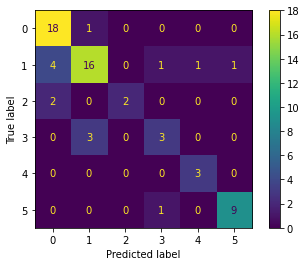

In [37]:
plot_confusion_matrix(best_forest_recall, X_test_std, y_test)
plt.show()

# PCA

Text(0, 0.5, 'PC2')

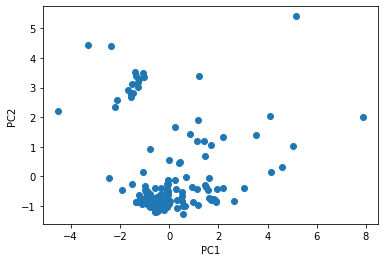

In [54]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
plt.scatter(X_train_pca[:,0], X_train_pca[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')

# Ensemble Learning

In [55]:
voting_cls = VotingClassifier(estimators=[
                                          ('Logistic Regression Precison metric', best_logreg_precision),
                                          ('Logistic Regression Recall metric', best_logreg_recall),
                                          ('Logistic Regression F1 metric', best_logreg_f1),
                                          ('SVM Precision metric', best_svc_precision),
                                          ('SVM Recall metric', best_svc_recall),
                                          ('SVM F1 metric', best_svc_f1),
                                          ('MLP Precision metric', best_mlp_precision),
                                          ('MLP Classifier Recall metric', best_mlp_recall),
                                          ('MLP Classifier F1 metric', best_mlp_f1),
                                          ('Decision Tree Precision metric', best_tree_precision),
                                          ('Decision Tree Recall metric', best_tree_recall),
                                          ('Decision Tree F1 metric', best_tree_f1),
                                          ('Random Forest Precision metric', best_forest_precision),
                                          ('Random Forest Recall metric', best_forest_recall),
                                          ('Random Forest F1 metric', best_forest_f1)
                                          ], voting = 'hard')
voting_cls = voting_cls.fit(X_train_std, y_train)
print('Training score ', voting_cls.score(X_train_std, y_train))
print('Testing score ', voting_cls.score(X_test_std, y_test))
best_scores.append([voting_cls.score(X_train_std, y_train), voting_cls.score(X_test_std, y_test)])

Training score  0.8926174496644296
Testing score  0.7384615384615385


# Comparision between different models

In [88]:
model_data = np.array(best_scores)
models = ['logreg_best_precision', 'logreg_best_recall', 'logreg_best_f1',
          'SVM_best_precision', 'SVM_best_recall', 'SVM_best_F1',
          'MLP_Classifier_best_precision', 'MLP_Classifier_best_recall', 'MLP_Classifier_best_f1',
          'decision_tree_best_precision', 'decision_tree_best_recall', 'decision_tree_best_f1',
          'random_forest_best_precision', 'random_forest_best_recall', 'random_forest_best_f1', 'Ensemble Learning']
table_scores = pd.DataFrame(data=model_data, index=models, columns=["Training score", "Testing score"])
table_scores

,Training score,Testing score
logreg_best_precision,0.644598,0.661538
logreg_best_recall,0.630505,0.661538
logreg_best_f1,0.610909,0.661538
SVM_best_precision,0.771812,0.676923
SVM_best_recall,0.672222,0.676923
SVM_best_F1,0.651837,0.676923
MLP_Classifier_best_precision,0.691275,0.646154
MLP_Classifier_best_recall,0.397071,0.646154
MLP_Classifier_best_f1,0.691275,0.615385
decision_tree_best_precision,0.986577,0.661538


### Learning Curve of Random Forest with recall

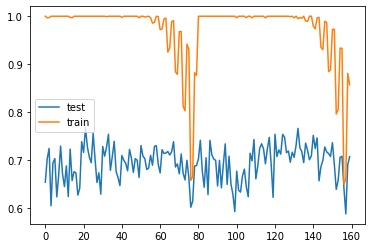

In [89]:
test_scores = forest_recall_gs.cv_results_['mean_test_score']
train_scores = forest_recall_gs.cv_results_['mean_train_score'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

### Model is overfitting

#### ROC Curve for Random Forest Recall

In [92]:
y_score = forest_recall_gs.predict_proba(X_test)

In [103]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])
n_classes = y_test_bin.shape[1]

In [104]:
y_score[:, 5]

array([0.28, 0.4 , 0.26, 0.38, 0.3 , 0.26, 0.3 , 0.28, 0.3 , 0.28, 0.32,
       0.36, 0.28, 0.3 , 0.24, 0.4 , 0.32, 0.24, 0.3 , 0.12, 0.3 , 0.4 ,
       0.4 , 0.38, 0.28, 0.24, 0.28, 0.3 , 0.36, 0.3 , 0.28, 0.3 , 0.3 ,
       0.3 , 0.24, 0.4 , 0.4 , 0.08, 0.28, 0.3 , 0.3 , 0.4 , 0.28, 0.3 ,
       0.2 , 0.12, 0.28, 0.3 , 0.28, 0.28, 0.06, 0.3 , 0.26, 0.3 , 0.3 ,
       0.28, 0.36, 0.28, 0.3 , 0.26, 0.28, 0.28, 0.28, 0.4 , 0.36])

AUC for Class 1: 0.7030892448512586
AUC for Class 2: 0.6511387163561076
AUC for Class 3: 0.6045081967213114
AUC for Class 4: 0.8997175141242938
AUC for Class 5: 0.7741935483870968
AUC for Class 6: 0.9654545454545455


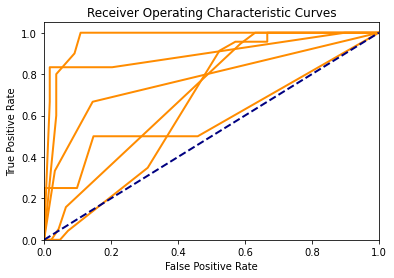

In [105]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
  plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)
  print('AUC for Class {}: {}'.format(i+1, auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.show()